In [427]:
import gym
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [428]:
env = gym.make("CarRacing-v2")

Action Space: Box([-1.  0.  0.], 1.0, (3,), float32)
Observation Space: Box(0, 255, (96, 96, 3), uint8)
Maximum Episode Steps: 1000


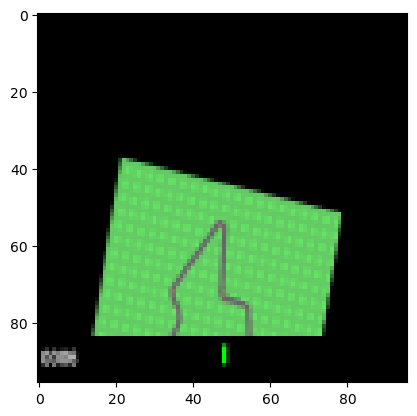

In [429]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
# env.spec.max_episode_steps = 100000
print(f"Maximum Episode Steps: {env.spec.max_episode_steps}")

observation, _ = env.reset()

plt.imshow(observation)
plt.show()


In [430]:
def processImage(img):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    greyImg = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    _, thresholdImage = cv2.threshold(greyImg,150,1,cv2.THRESH_BINARY_INV)
    thresholdImage = thresholdImage[:83]
    return thresholdImage

# Action Space

[a,b,c]:

    a: Steer, Negative is Left, Positive is Right

    b: Accelarate
    
    c: Decelarate



In [431]:
ACTIONS = {
    0: [1, 0, 0],
    1: [-1, 0, 0],
    2: [0,0,0.8],
    3: [0,1,0],
    4: [0,0,0]
}

IMG_DIMENSION = 83*96

EPISODES = 1000
GAMMA = 0.3
LEARNING_RATE = 0.1

In [432]:
for _ in range(1000):
    action = np.random.randint(0,5)
    observation, reward, terminated, truncated, info = env.step(ACTIONS[action])
    processedImg = processImage(observation)
    cv2.imshow("observation", processedImg*255)
    cv2.waitKey(1)

cv2.destroyAllWindows()
_, _ = env.reset()